<div style="color: Green; font-size: 30px; text-align: center; font-weight: bold;">
    Real Estate Price Prediction
</div>

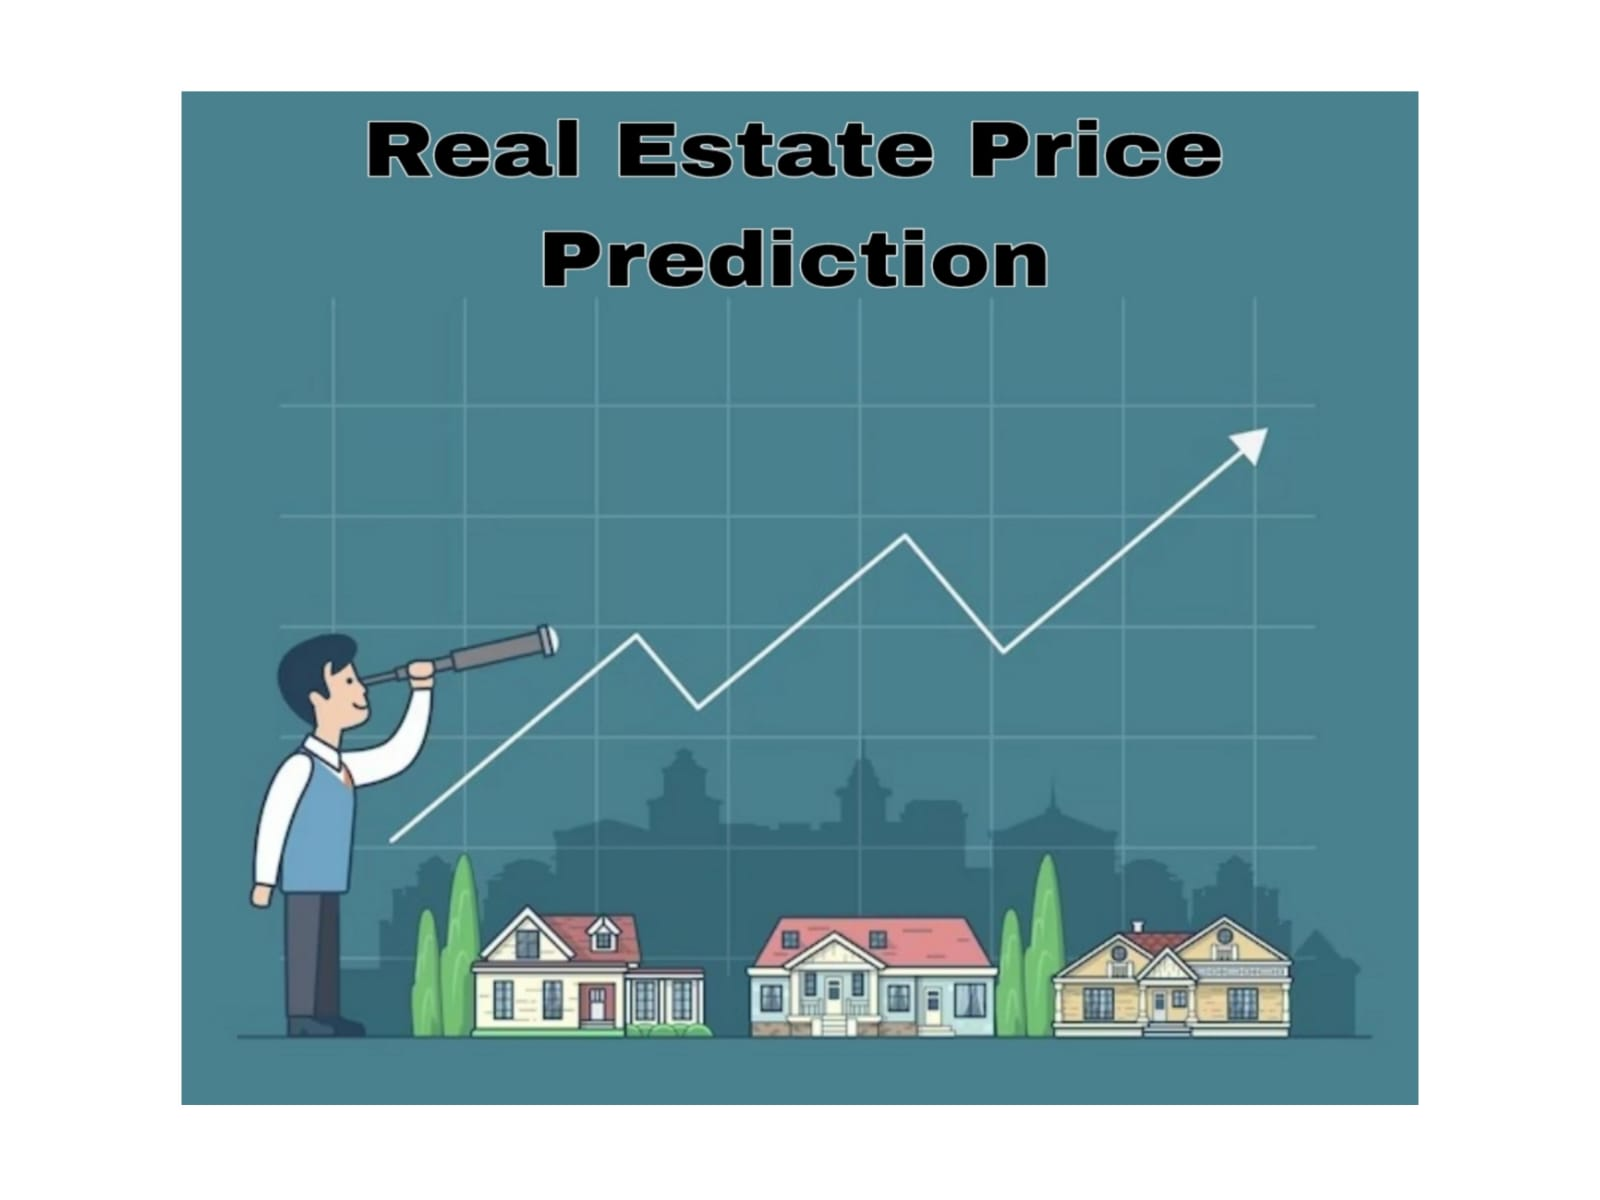

Problem Statement :

Real estate prices fluctuate based on various factors such as location, size, amenities, and market demand. Predicting accurate property prices is crucial for buyers, sellers, and real estate professionals to make informed decisions. The goal of this project is to develop a machine learning model that can accurately predict real estate prices based on relevant features.

# Importing dataset

In [17]:
import pandas as pd
import numpy as np


In [4]:
real_estate_data = pd.read_csv('Real_Estate.csv')
real_estate_data

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.01500,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.01440,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.67100,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.06700,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.40000,6,25.011037,121.479946,21.654710
...,...,...,...,...,...,...,...
409,2013-07-25 15:30:36.565239,18.3,170.12890,6,24.981186,121.486798,29.096310
410,2013-07-26 17:16:34.019780,11.9,323.69120,2,24.950070,121.483918,33.871347
411,2013-07-28 21:47:23.339050,0.0,451.64190,8,24.963901,121.543387,25.255105
412,2013-07-29 13:33:29.405317,35.9,292.99780,5,24.997863,121.558286,25.285620


In [5]:
real_estate_data.head()

,Transaction date,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
0,2012-09-02 16:42:30.519336,13.3,4082.0150,8,25.007059,121.561694,6.488673
1,2012-09-04 22:52:29.919544,35.5,274.0144,2,25.012148,121.546990,24.970725
2,2012-09-05 01:10:52.349449,1.1,1978.6710,10,25.003850,121.528336,26.694267
3,2012-09-05 13:26:01.189083,22.2,1055.0670,5,24.962887,121.482178,38.091638
4,2012-09-06 08:29:47.910523,8.5,967.4000,6,25.011037,121.479946,21.654710


In [10]:
real_estate_data.columns

Index(['Transaction date', 'House age', 'Distance to the nearest MRT station',
       'Number of convenience stores', 'Latitude', 'Longitude',
       'House price of unit area'],
      dtype='object')

In our dataset, their are 7 columns.

1. Transaction date:                     The date of the real estate transaction.

2. House age:                            Age of the house in years.

3. Distance to the nearest MRT station:  Distance to the nearest Mass Rapid Transit station in meters.

4. Number of convenience stores:         Number of convenience stores in the vicinity.

5. Latitude:                             Latitude of the property location.

6. Longitude:                            Longitude of the property location.

7. House price of unit area:             House price of unit area.

*****************

In [7]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House age                            414 non-null    float64
 2   Distance to the nearest MRT station  414 non-null    float64
 3   Number of convenience stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House price of unit area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [8]:
real_estate_data.describe()

,House age,Distance to the nearest MRT station,Number of convenience stores,Latitude,Longitude,House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


Let see, if our dataset contain any null values or not

In [14]:
real_estate_data.isnull().sum()

Transaction date                       0
House age                              0
Distance to the nearest MRT station    0
Number of convenience stores           0
Latitude                               0
Longitude                              0
House price of unit area               0
dtype: int64

There are no null values in the dataset

**********************

# Data Visualization

Now we will plot some histograms to gain some insights from visualization. 

<AxesSubplot:xlabel='House age', ylabel='Count'>

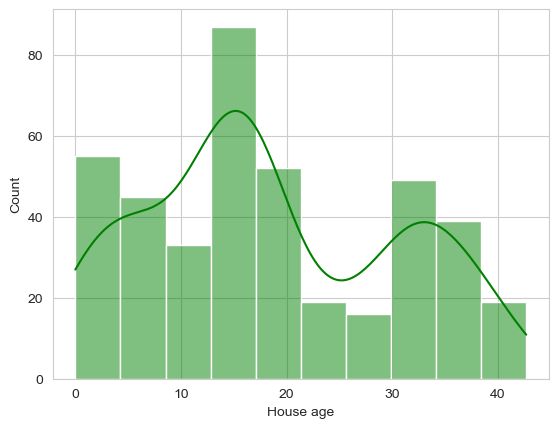

In [36]:
col = 'House age' 
sns.histplot(real_estate_data[col], kde=True,color = 'green')

This histogram shows a relatively uniform distribution. With a slight increase in the number of newer properties (lower age).

<AxesSubplot:xlabel='Distance to the nearest MRT station', ylabel='Count'>

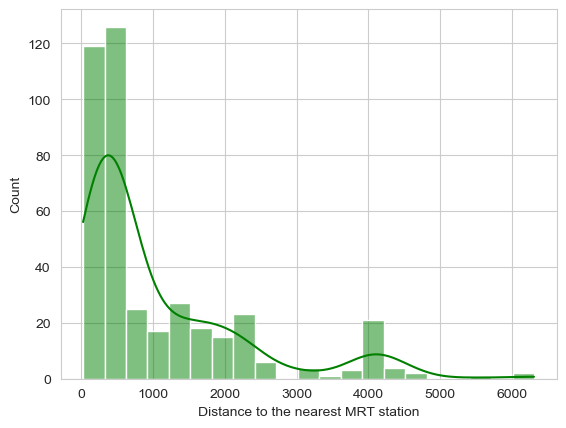

In [37]:
col = 'Distance to the nearest MRT station' 
sns.histplot(real_estate_data[col], kde=True,color = 'green')

In this histogram, we can see most properties are located close to an MRT station. There’s a long tail extending towards higher distances, suggesting some properties are quite far from MRT stations.

<AxesSubplot:xlabel='Number of convenience stores', ylabel='Count'>

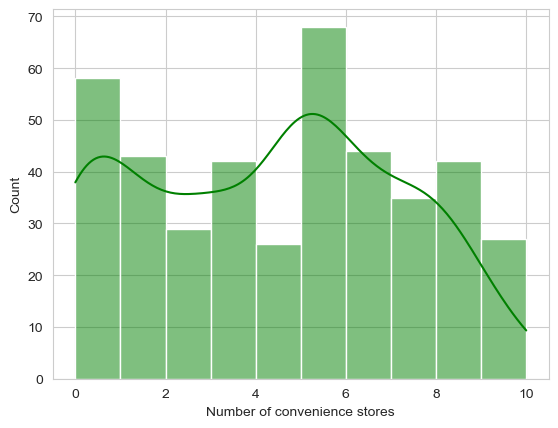

In [39]:
col = 'Number of convenience stores' 
sns.histplot(real_estate_data[col], kde=True,color = 'green')

In this hostogram, we can see it displays a wide range, with notable peaks at specific counts, like 0, 5. It suggests certain common configurations in terms of convenience store availability.

<AxesSubplot:xlabel='Latitude', ylabel='Count'>

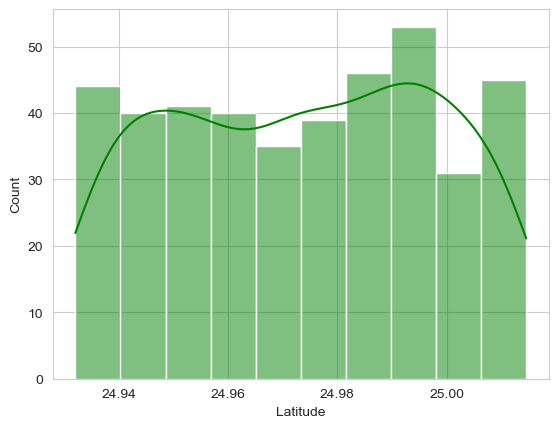

In [40]:
col = 'Latitude' 
sns.histplot(real_estate_data[col], kde=True,color = 'green')

This histogram shows latitude of the property location.

<AxesSubplot:xlabel='Longitude', ylabel='Count'>

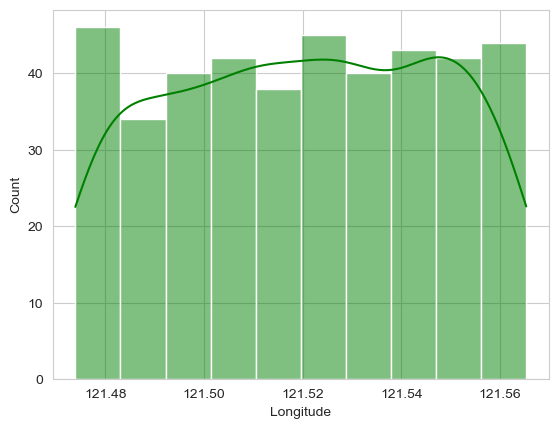

In [41]:
col = 'Longitude' 
sns.histplot(real_estate_data[col], kde=True,color = 'green')

This histogram shows longitude of the property location.

<AxesSubplot:xlabel='House price of unit area', ylabel='Count'>

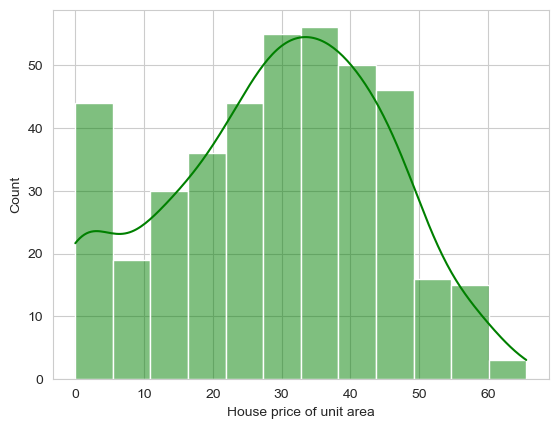

In [42]:
col = 'House price of unit area' 
sns.histplot(real_estate_data[col], kde=True,color = 'green')

This histogram shows a right-skewed distribution, with a concentration of properties in the lower price range and fewer properties as prices increase.

**********************

Now we will create some scatter plots to explore the relationships between these variables and the house price. This scatter plots will help us to understand which factors might be effecting property prices more significantly.

<function matplotlib.pyplot.show(close=None, block=None)>

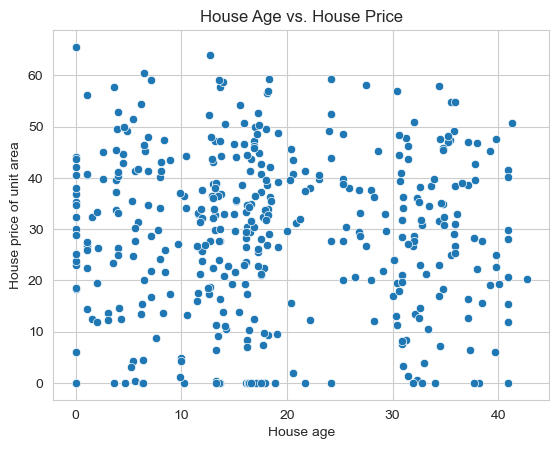

In [43]:
sns.scatterplot(data=real_estate_data, x='House age', y='House price of unit area')
plt.title('House Age vs. House Price')
plt.show

In this scatter plot, there doesn’t seem to be a strong linear relationship between house age and price. However, it appears that very new and very old houses might have higher prices.

<function matplotlib.pyplot.show(close=None, block=None)>

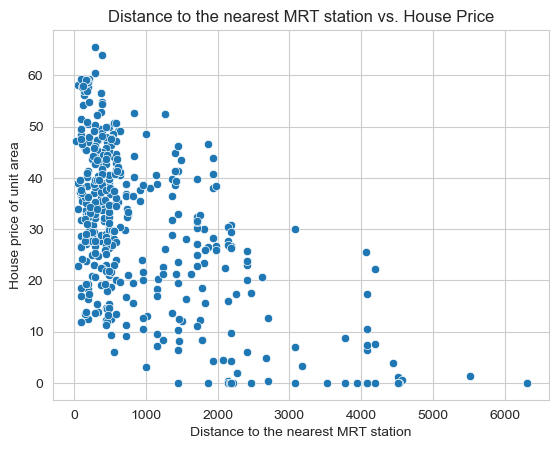

In [45]:
sns.scatterplot(data=real_estate_data, x='Distance to the nearest MRT station', y='House price of unit area')
plt.title('Distance to the nearest MRT station vs. House Price')
plt.show

In this scatter plot we can see, that as the distance to the nearest MRT station increases, the house price decreases. It suggests a strong negative relationship between these two variables.

<function matplotlib.pyplot.show(close=None, block=None)>

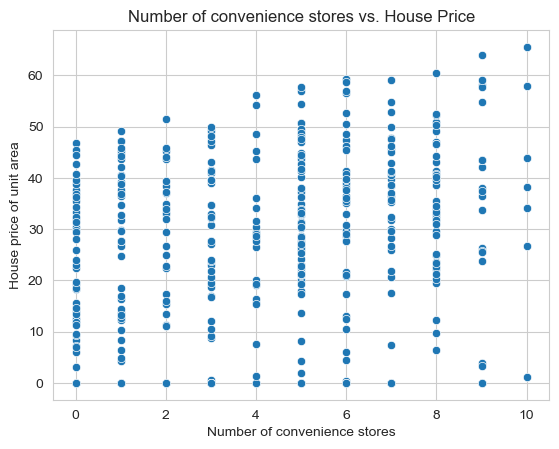

In [46]:
sns.scatterplot(data=real_estate_data, x='Number of convenience stores', y='House price of unit area')
plt.title('Number of convenience stores vs. House Price')
plt.show

Here we can see that, there seems to be a positive relationship between the number of convenience stores and house prices. Houses with more convenience stores in the vicinity tend to have higher prices.

*************

Now we will see some correlation analysis. It would be good to perform correlation analysis to see the relationship between these variables.

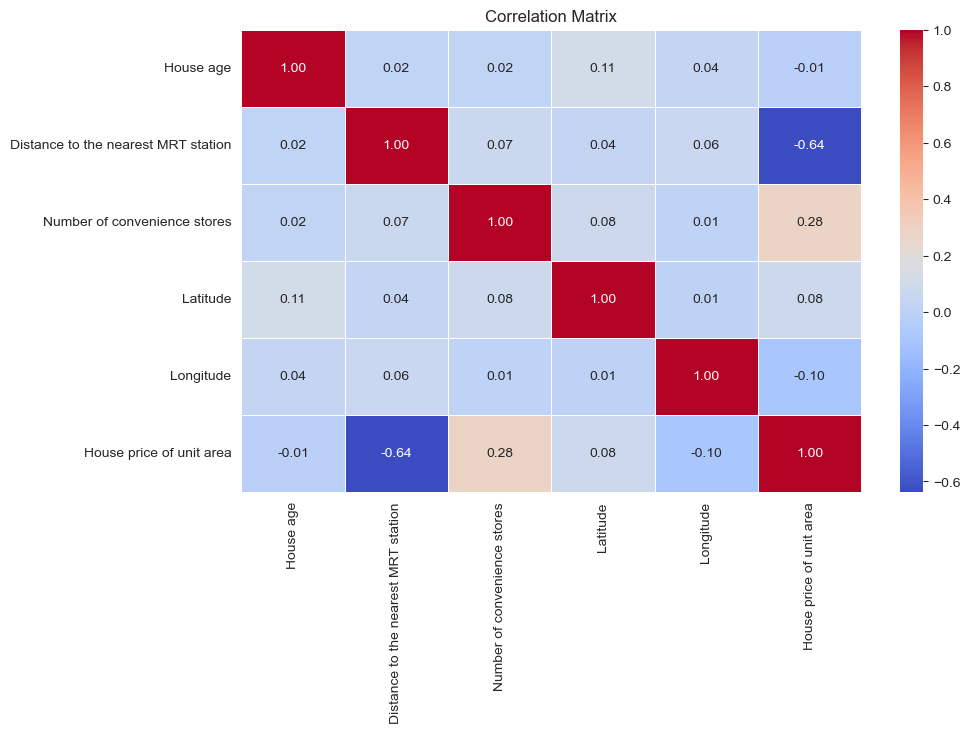

In [49]:
# Correlation matrix
correlation_matrix = real_estate_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


The correlation matrix provides some good quality insights into how each variable is related to the others, especially with respect to the house price:

1. House Age: This shows a very weak negative correlation with house price (-0.012), implying that age is not a strong predictor of price in this dataset.
2. Distance to Nearest MRT Station: Has a strong negative correlation with house price (-0.637). It indicates that properties closer to MRT stations tend to have higher prices, which is a significant factor in property valuation.
3. Number of Convenience Stores: Displays a moderate positive correlation with house price (0.281). More convenience stores in the vicinity seem to positively affect property prices.
4. Latitude and Longitude: Both show a weak correlation with house prices. Latitude has a slight positive correlation (0.081), while longitude has a slight negative correlation (-0.099).

**************

Overall, the most significant factors affecting house prices in this dataset appear is MRT stations and the number of convenience stores nearby. Latitude and Longitude and the age of the house seem to have less impact on the price.

****************

# Model building

In [50]:
from sklearn.model_selection import train_test_split

# Selecting features and target variable
features = ['Distance to the nearest MRT station', 'Number of convenience stores', 'Latitude', 'Longitude']
target = 'House price of unit area'

X = real_estate_data[features]
y = real_estate_data[target]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train.shape

(331, 4)

In [53]:
X_test.shape

(83, 4)

In [55]:
y_train.shape

(331,)

In [56]:
y_test.shape

(83,)

****

1. Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

# Model initialization
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [61]:
y_pred_lr = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lr)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lr)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred_lr)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) score:", r2)

Mean Absolute Error (MAE): 9.518038948836542
Mean Squared Error (MSE): 124.57938927549796
Root Mean Squared Error (RMSE): 11.161513753765568
R-squared (R2) score: 0.5496730640943439


*****

2. Decision Tree Regressor

In [62]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [63]:
y_pred_dt=dt.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dt)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) score:", r2)

Mean Absolute Error (MAE): 12.31982714241932
Mean Squared Error (MSE): 254.5277534541983
Root Mean Squared Error (RMSE): 15.9539259573999
R-squared (R2) score: 0.07993847150346567


**********

3. Random Forest Regressor

In [64]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200,max_depth=15,min_samples_split=4,random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_split=4, n_estimators=200,
                      random_state=42)

In [65]:
y_pred_rf=rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) score:", r2)

Mean Absolute Error (MAE): 9.713810662245152
Mean Squared Error (MSE): 133.96908945118838
Root Mean Squared Error (RMSE): 11.574501693428896
R-squared (R2) score: 0.5157313749129929


***********

After looking evaluation metrics, we decided to go with linear regression model.

let’s visualize the actual versus predicted values to assess how well our model is performing:

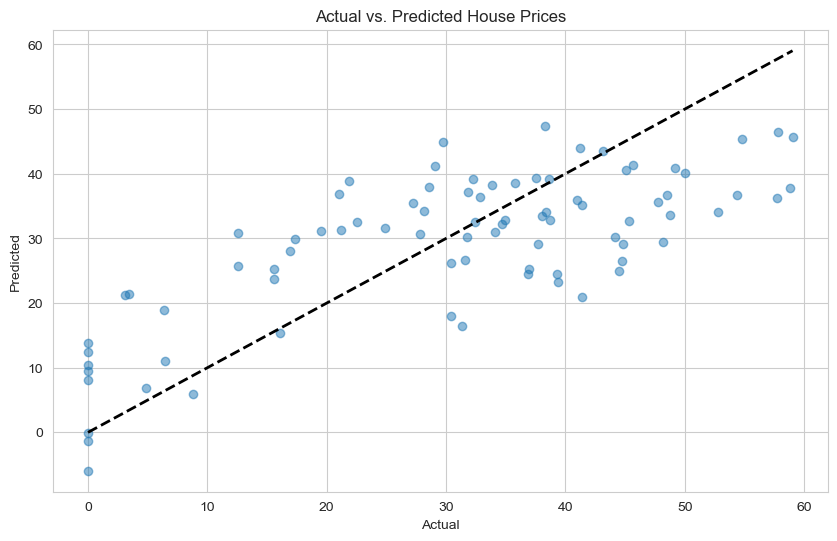

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

The diagonal dashed line represents where the actual and predicted values would be equal. Points close to this line indicate accurate predictions. From the plot, we can observe:

1. Many points are close to the diagonal line, suggesting that the model makes reasonably accurate predictions for a significant portion of the test set.
2. Some points are further from the line, indicating areas where the model’s predictions deviate more significantly from the actual values.

*************

Now let’s check house price of unit area by feeding values into the model:

In [74]:
House_price_of_unit_area = model.predict([[72.987, 7, 24.98034, 121.53951]])
print('House price of unit area =', House_price_of_unit_area)

House price of unit area = [41.85047]


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


So, when Distance to the nearest MRT station is 72.987, Number of convenience stores are 7, Latitude is 24.98034 and Longitude is 121.53951 then House price of unit area will be 41.85

This is how we can predict real estate prices with Machine Learning using Python.

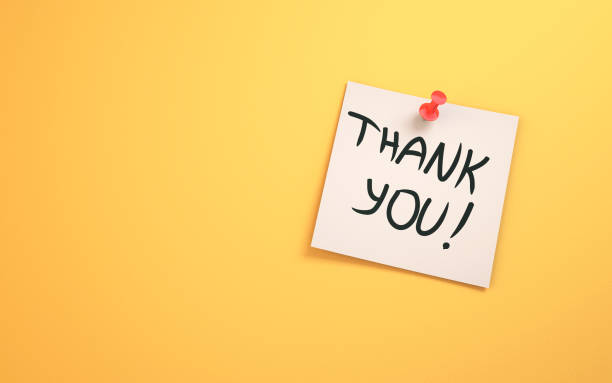